In [1]:
import matplotlib.pyplot as plt 
import pandas as pd 
import numpy as np 
import seaborn as sns
from scipy.stats.mstats import winsorize
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')

pd.options.display.float_format= '{:.3f}'.format

# Kickstarter Projects

- ID:internal kickstarter id
- name:name of project - A project is a finite work with a clear goal that you’d like to bring to life. Think albums, books, or films.
- category:category
- main_category:category of campaign
- currency:currency used to support
- deadline:deadline for crowdfunding
- goal:fundraising goal The funding goal is the amount of money that a creator needs to complete their project.
- launched:date launched
- pledged:amount pledged by "crowd"
- state:Current condition the project is in
- backers:number of backers
- country:country pledged from
- usd pledged:amount of money pledged

## Sorular 
- Bir girişim hangi şartlar altında başarılı olmuş (main question)
- Yatırımcılar en çok hangi category ye bağış yapmış(yıllara göre)
- En çok hangi yıl yatırım almış 
- En çok hangi category başarılı olmuş
- En çok hangi yıl başarılı girişim var 
- Ne kadar girişim amaçladıgı parayı toplamış 
- Kaç tane girişim hedeflediği parayı toplamamasına rağmen başarılı olmuş 
- kaç tane girişim hedeflediği parayı toplamasına rağmen başarısız olmuş 
- En çok hangi ülke yatırım almış
- hangi ülke başarılı olmuş
- ülkeler hangi sektör de başarılılar
- ülkelerin yıllara göre başarılı oldugu categoryler
- en çok hedeflediği yatırımı alan category ler


In [2]:
starts= pd.read_csv('ks-projects-201801.csv')
starts.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.000,2015-08-11 12:12:28,0.000,failed,0,GB,0.000,0.000,1533.950
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.000,2017-09-02 04:43:57,2421.000,failed,15,US,100.000,2421.000,30000.000
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.000,2013-01-12 00:20:50,220.000,failed,3,US,220.000,220.000,45000.000
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.000,2012-03-17 03:24:11,1.000,failed,1,US,1.000,1.000,5000.000
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.000,2015-07-04 08:35:03,1283.000,canceled,14,US,1283.000,1283.000,19500.000


In [3]:
starts.isnull().sum()*100/starts.shape[0]

ID                 0.000
name               0.001
category           0.000
main_category      0.000
currency           0.000
deadline           0.000
goal               0.000
launched           0.000
pledged            0.000
state              0.000
backers            0.000
country            0.000
usd pledged        1.003
usd_pledged_real   0.000
usd_goal_real      0.000
dtype: float64

In [4]:
starts.columns

Index(['ID', 'name', 'category', 'main_category', 'currency', 'deadline',
       'goal', 'launched', 'pledged', 'state', 'backers', 'country',
       'usd pledged', 'usd_pledged_real', 'usd_goal_real'],
      dtype='object')

In [5]:
starts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 15 columns):
ID                  378661 non-null int64
name                378657 non-null object
category            378661 non-null object
main_category       378661 non-null object
currency            378661 non-null object
deadline            378661 non-null object
goal                378661 non-null float64
launched            378661 non-null object
pledged             378661 non-null float64
state               378661 non-null object
backers             378661 non-null int64
country             378661 non-null object
usd pledged         374864 non-null float64
usd_pledged_real    378661 non-null float64
usd_goal_real       378661 non-null float64
dtypes: float64(5), int64(2), object(8)
memory usage: 43.3+ MB


In [6]:
starts['goal'].unique()

array([  1000.,  30000.,  45000., ..., 186037.,  33975.,  28559.])

In [7]:
starts['usd pledged'].unique()

array([   0.  ,  100.  ,  220.  , ..., 1732.02, 5019.92, 2698.97])

In [8]:
starts['usd pledged'].fillna(starts['usd_pledged_real'], inplace=True)

In [9]:
starts.isnull().sum()*100/starts.shape[0]

ID                 0.000
name               0.001
category           0.000
main_category      0.000
currency           0.000
deadline           0.000
goal               0.000
launched           0.000
pledged            0.000
state              0.000
backers            0.000
country            0.000
usd pledged        0.000
usd_pledged_real   0.000
usd_goal_real      0.000
dtype: float64

In [10]:
# Check missing values in the column "name"
starts[pd.isnull(starts['name'])].index

Int64Index([166851, 307234, 309991, 338931], dtype='int64')

In [11]:
starts[starts.index == 166851]
starts[starts.index == 307234]

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
307234,634871725,NaN,Video Games,Games,GBP,2013-01-06,2000.000,2012-12-19 23:57:48,196.000,failed,12,GB,317.730,316.050,3224.970


In [12]:
starts['name'].unique()

array(['The Songs of Adelaide & Abullah',
       'Greeting From Earth: ZGAC Arts Capsule For ET', 'Where is Hank?',
       ...,
       'Walls of Remedy- New lesbian Romantic Comedy feature unlike any other!!',
       'BioDefense Education Kit', 'Nou Renmen Ayiti!  We Love Haiti!'],
      dtype=object)

In [13]:
starts.shape

(378661, 15)

In [14]:
# we have a lot data so we can delete mising value of name feature but we imputing with 'unknown'
starts['name'].fillna('unknown',inplace=True)

In [15]:
starts.isnull().sum()*100/starts.shape[0]

ID                 0.000
name               0.000
category           0.000
main_category      0.000
currency           0.000
deadline           0.000
goal               0.000
launched           0.000
pledged            0.000
state              0.000
backers            0.000
country            0.000
usd pledged        0.000
usd_pledged_real   0.000
usd_goal_real      0.000
dtype: float64

In [16]:
starts.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.000,2015-08-11 12:12:28,0.000,failed,0,GB,0.000,0.000,1533.950
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.000,2017-09-02 04:43:57,2421.000,failed,15,US,100.000,2421.000,30000.000
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.000,2013-01-12 00:20:50,220.000,failed,3,US,220.000,220.000,45000.000
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.000,2012-03-17 03:24:11,1.000,failed,1,US,1.000,1.000,5000.000
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.000,2015-07-04 08:35:03,1283.000,canceled,14,US,1283.000,1283.000,19500.000


# Aşırı değerler 

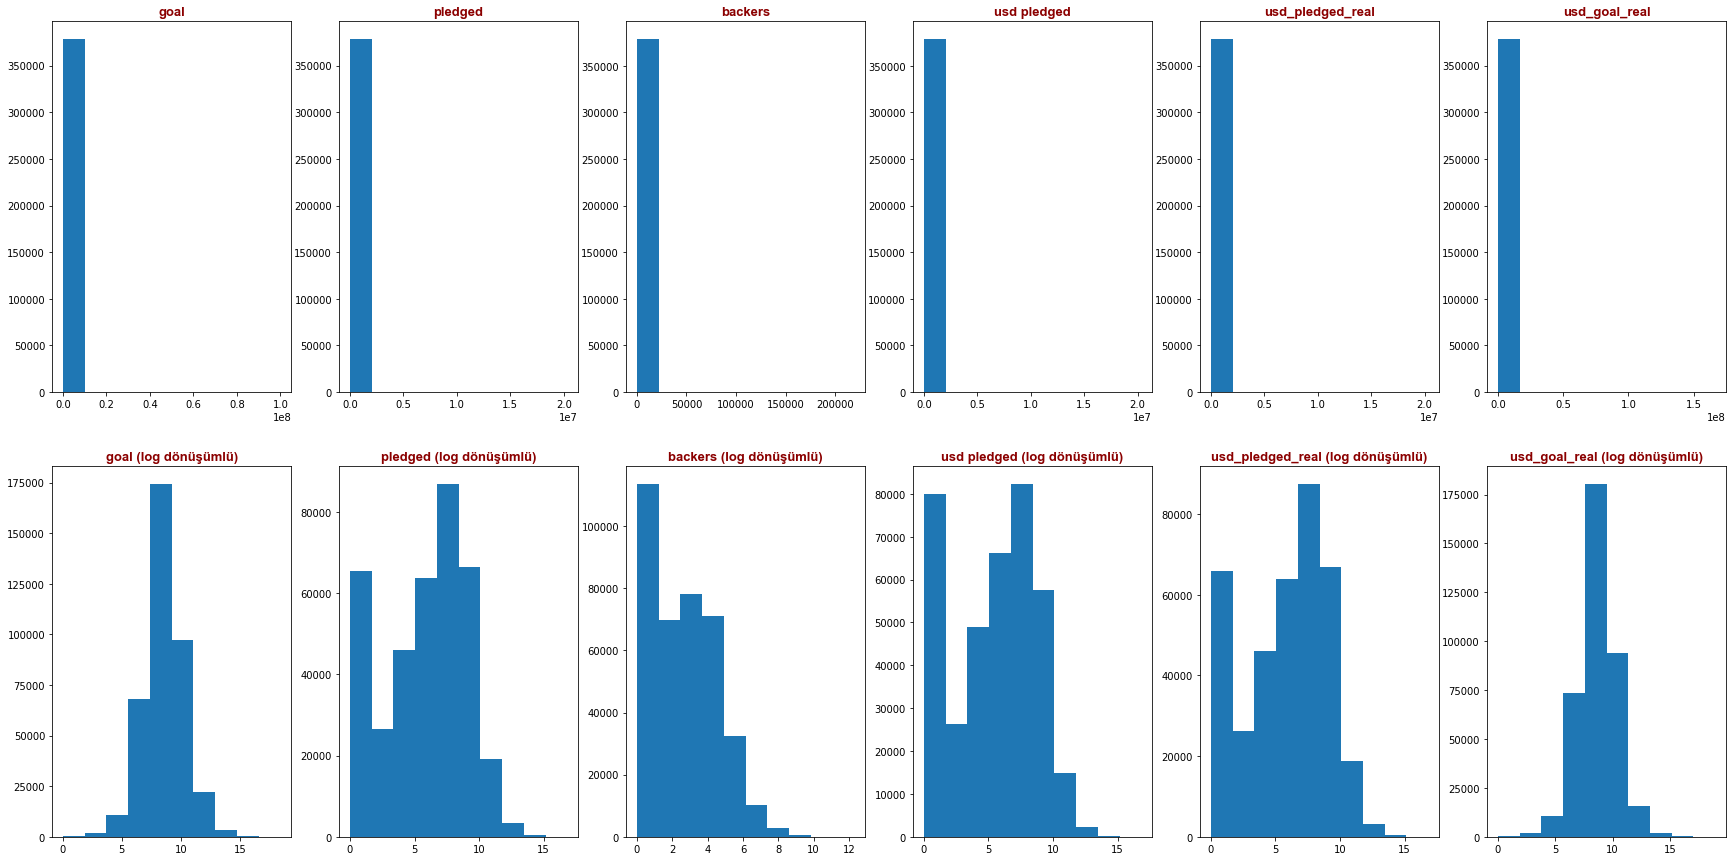

In [17]:
plt.figure(figsize=(30,15))
baslik_font = {'family': 'arial', 'color': 'darkred','weight': 'bold','size': 13 }
eksen_font  = {'family': 'arial', 'color': 'darkblue','weight': 'bold','size': 10 }

degiskenler = ['goal', 'pledged' , 'backers',"usd pledged","usd_pledged_real","usd_goal_real"]

for i in range(6):
    plt.subplot(2, 6, i+1)
    plt.hist(starts[degiskenler[i]])
    plt.title(degiskenler[i], fontdict=baslik_font)
    
for i in range(6):
    plt.subplot(2, 6, i+7)
    plt.hist(np.log(starts[degiskenler[i]]+1))
    plt.title(degiskenler[i] + ' (log dönüşümlü)', fontdict=baslik_font)

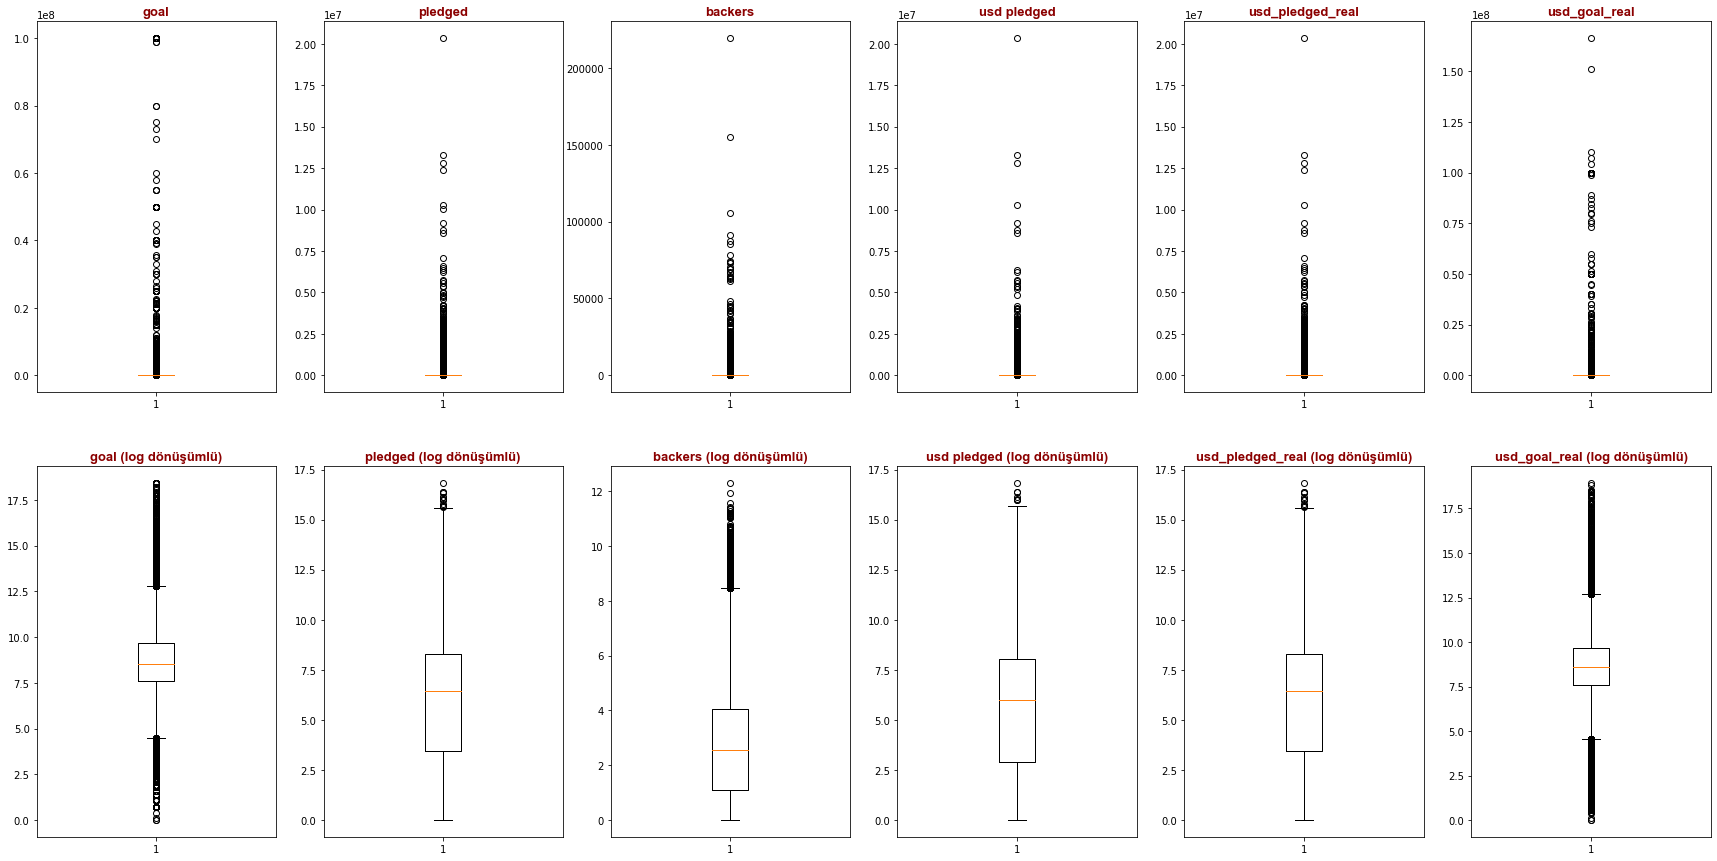

In [18]:
plt.figure(figsize=(30,15))
baslik_font = {'family': 'arial', 'color': 'darkred','weight': 'bold','size': 13 }
eksen_font  = {'family': 'arial', 'color': 'darkblue','weight': 'bold','size': 10 }

degiskenler = ['goal', 'pledged' , 'backers',"usd pledged","usd_pledged_real","usd_goal_real"]

for i in range(6):
    plt.subplot(2, 6, i+1)
    plt.boxplot(starts[degiskenler[i]])
    plt.title(degiskenler[i], fontdict=baslik_font)
    
for i in range(6):
    plt.subplot(2, 6, i+7)
    plt.boxplot(np.log(starts[degiskenler[i]]+1))
    plt.title(degiskenler[i] + ' (log dönüşümlü)', fontdict=baslik_font)

In [19]:
# IQR Method 

q75,q25= np.percentile(starts['goal'],[75,25])
caa= q75-q25

In [20]:
esik_degerleri=[]
for esik_degeri in np.arange(1,5):
    min_deger=q25 - (caa*esik_degeri)
    max_deger=q75 + (caa*esik_degeri)
    
    aykiri_deger_sayisi=len((np.where((starts['goal']>max_deger) | (starts['goal']<min_deger))[0]))
    esik_degerleri.append((esik_degeri,aykiri_deger_sayisi))
esik_degerleri

[(1, 52172), (2, 41784), (3, 28166), (4, 23545)]

In [21]:
log_esik_degerleri = pd.DataFrame()
degiskenler = ['goal', 'pledged' , 'backers',"usd pledged","usd_pledged_real","usd_goal_real"]
for j in degiskenler:
    for esik_degeri in np.arange(1,5,1):
        q75_log, q25_log = np.percentile(np.log(starts[j]), [75 ,25])
        caa_log = q75_log - q25_log
        q75, q25 = np.percentile(starts[j], [75 ,25])
        caa= q75 - q25
        min_deger_log = q25_log - (caa_log*esik_degeri) 
        maks_deger_log = q75_log + (caa_log*esik_degeri)
        min_deger= q25 - (caa*esik_degeri) #log dönüşümü olmadan
        maks_deger = q75 + (caa*esik_degeri) #log dönüşümü olmadan
        aykiri_deger_sayisi_log = len((np.where((np.log(starts[j]) > maks_deger_log)| 
                                               (np.log(starts[j]) < min_deger_log))[0]))
        aykiri_deger_sayisi = len((np.where((starts[j] > maks_deger)| 
                                               (starts[j] < min_deger))[0]))
        log_esik_degerleri = log_esik_degerleri.append({'esik_degeri': esik_degeri,
                                                            'aykiri_deger_sayisi' : aykiri_deger_sayisi, #log dönüşümü olmadan
                                                            'aykiri_deger_sayisi_log': aykiri_deger_sayisi_log 
                                                            }, ignore_index=True)
    print("-"*10,"",j,"-"*10)
    display(log_esik_degerleri)
    log_esik_degerleri = pd.DataFrame()
        

----------  goal ----------


,aykiri_deger_sayisi,aykiri_deger_sayisi_log,esik_degeri
0,52172.000,22697.000,1.000
1,41784.000,3582.000,2.000
2,28166.000,700.000,3.000
3,23545.000,46.000,4.000


----------  pledged ----------


,aykiri_deger_sayisi,aykiri_deger_sayisi_log,esik_degeri
0,59490.000,53251.000,1.000
1,42702.000,52527.000,2.000
2,33112.000,52527.000,3.000
3,27613.000,52527.000,4.000


----------  backers ----------


,aykiri_deger_sayisi,aykiri_deger_sayisi_log,esik_degeri
0,55141.000,59197.000,1.000
1,38255.000,55633.000,2.000
2,29013.000,55609.000,3.000
3,23258.000,55609.000,4.000


----------  usd pledged ----------


,aykiri_deger_sayisi,aykiri_deger_sayisi_log,esik_degeri
0,59985.000,69256.000,1.000
1,44337.000,68830.000,2.000
2,33973.000,68830.000,3.000
3,27991.000,68830.000,4.000


----------  usd_pledged_real ----------


,aykiri_deger_sayisi,aykiri_deger_sayisi_log,esik_degeri
0,59139.000,53190.000,1.000
1,42158.000,52527.000,2.000
2,32535.000,52527.000,3.000
3,26846.000,52527.000,4.000


----------  usd_goal_real ----------


,aykiri_deger_sayisi,aykiri_deger_sayisi_log,esik_degeri
0,57848.000,23703.000,1.000
1,39758.000,3842.000,2.000
2,26943.000,724.000,3.000
3,22752.000,47.000,4.000


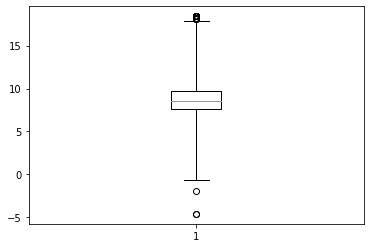

In [22]:
# if we apply interpolite for 'goal' feature becasue it has a lot outlier value
plt.boxplot(np.log(starts['goal']),whis=4)
plt.show()

In [25]:
# starts['success_pleged_ration']= (starts['pledged']*100)/starts['goal']

In [23]:
starts.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.000,2015-08-11 12:12:28,0.000,failed,0,GB,0.000,0.000,1533.950
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.000,2017-09-02 04:43:57,2421.000,failed,15,US,100.000,2421.000,30000.000
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.000,2013-01-12 00:20:50,220.000,failed,3,US,220.000,220.000,45000.000
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.000,2012-03-17 03:24:11,1.000,failed,1,US,1.000,1.000,5000.000
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.000,2015-07-04 08:35:03,1283.000,canceled,14,US,1283.000,1283.000,19500.000


# backers ı  log yapmıyoruz çünkü kendisi kişi sayısı böylelikle verinin değerini real anlamda tutuyoruz
# goal pledged ve success_pledged_ratio yu log alacagız fakat goal ve pledged ın log ifadesini aldıktan sonra succes_pledged_ration alacagız ki log lu ifadenin oranın almış olalım

In [24]:
# log ifadeli değerlere dönüştürüyoruz aykırı degerlerden kurtulmak için
starts_2= starts.copy()

In [25]:
starts_2['goal']= np.log(starts_2['goal'])
starts_2['pledged']= np.log(starts_2['pledged']+1) # we have 0.. if there is 0 log will write -inf
starts_2['usd pledged']= np.log(starts_2['usd pledged']+1)  
starts_2['usd_pledged_real']=np.log(starts_2['usd_pledged_real']+1) 
starts_2['usd_goal_real']= np.log(starts_2['usd_goal_real'])

In [26]:
np.log(starts_2['goal']).isnull().index # herhangi bir boş değerimiz yok.. 

RangeIndex(start=0, stop=378661, step=1)

In [27]:
starts_2['pledged']

0        0.000
1        7.792
2        5.398
3        0.693
4        7.158
          ... 
378656   3.258
378657   5.050
378658   3.045
378659   5.303
378660   6.263
Name: pledged, Length: 378661, dtype: float64

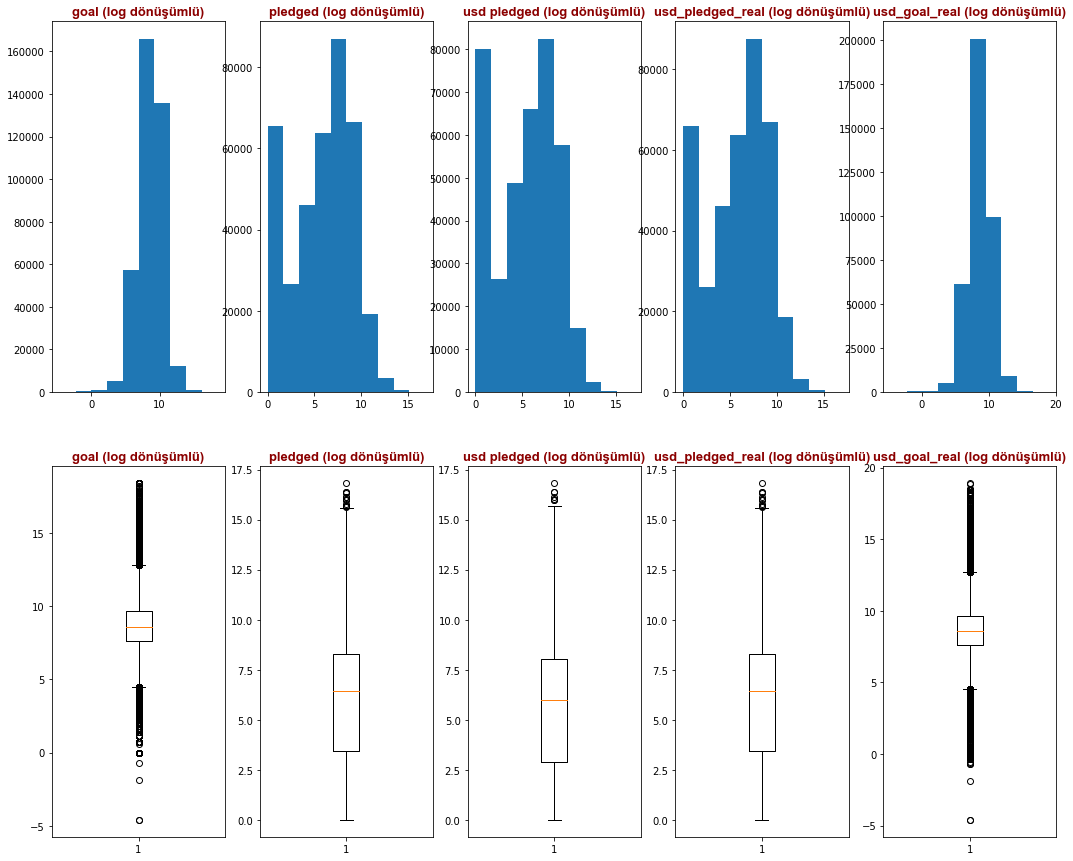

In [28]:
plt.figure(figsize=(18,15))
log_columns=['goal','pledged','usd pledged','usd_pledged_real','usd_goal_real']
    
for i in range(5):
    plt.subplot(2, 5, i+1)
    plt.hist(starts_2[log_columns[i]])
    plt.title(log_columns[i] + ' (log dönüşümlü)', fontdict=baslik_font)
for i in range(5):
    plt.subplot(2, 5, i+6)
    plt.boxplot(starts_2[log_columns[i]])
    plt.title(log_columns[i] + ' (log dönüşümlü)', fontdict=baslik_font)

# yukarıda göründüğü gibi ifadelerimin log larını aldık ve ayıkırı değerlerden biraz olsun kurtulduk fakat 'goal' değilkeni bizim hedef değişkenlerimizden biri oldugu için onu winsorize edeceğiz ki aykırı değerlerden ne kadar azaltırsak o kadar iyi 

In [29]:
from scipy.stats.mstats import winsorize
winsorize_goruntulenme = winsorize(starts_2["goal"], (0.20, 0.10))

winsorize_goruntulenme

masked_array(data=[ 7.31322039, 10.30895266, 10.71441777, ...,
                    9.61580548,  9.61580548,  7.60090246],
             mask=False,
       fill_value=1e+20)

{'whiskers': [<matplotlib.lines.Line2D at 0x24e718a3dc8>,
 'caps': [<matplotlib.lines.Line2D at 0x24e718a6d88>,
 'boxes': [<matplotlib.lines.Line2D at 0x24e718a3448>],
 'medians': [<matplotlib.lines.Line2D at 0x24e718a8d08>],
 'fliers': [<matplotlib.lines.Line2D at 0x24e718a8c48>],
 'means': []}

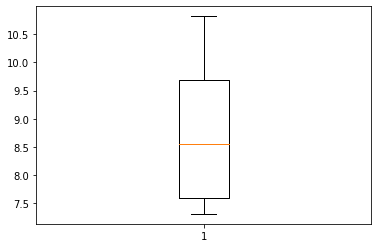

In [30]:
plt.boxplot(winsorize_goruntulenme)

(array([101365.,  32872.,  20284.,  46906.,  23529.,  38889.,  22161.,
         19896.,  25561.,  47198.]),
 array([ 7.31322039,  7.66387618,  8.01453197,  8.36518776,  8.71584355,
         9.06649934,  9.41715513,  9.76781092, 10.1184667 , 10.46912249,
        10.81977828]),
 <a list of 10 Patch objects>)

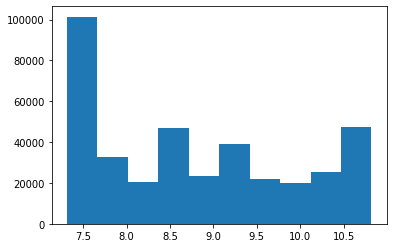

In [31]:
plt.hist(winsorize_goruntulenme)

In [50]:
starts_2['goal']=winsorize(starts_2["goal"], (0.20,0.10))
starts_2['usd_goal_real']=winsorize(starts_2["usd_goal_real"], (0.20,0.10))

{'whiskers': [<matplotlib.lines.Line2D at 0x24e730d3808>,
 'caps': [<matplotlib.lines.Line2D at 0x24e730d3f48>,
 'boxes': [<matplotlib.lines.Line2D at 0x24e730ced88>],
 'medians': [<matplotlib.lines.Line2D at 0x24e730d8e88>],
 'fliers': [<matplotlib.lines.Line2D at 0x24e730dd688>],
 'means': []}

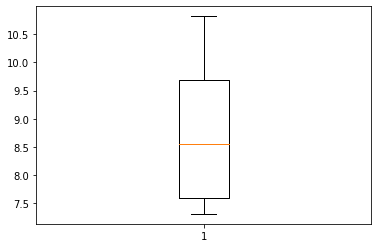

In [33]:
plt.boxplot(starts_2['goal'])

(array([101365.,  32872.,  20284.,  46906.,  23529.,  38889.,  22161.,
         19896.,  25561.,  47198.]),
 array([ 7.31322039,  7.66387618,  8.01453197,  8.36518776,  8.71584355,
         9.06649934,  9.41715513,  9.76781092, 10.1184667 , 10.46912249,
        10.81977828]),
 <a list of 10 Patch objects>)

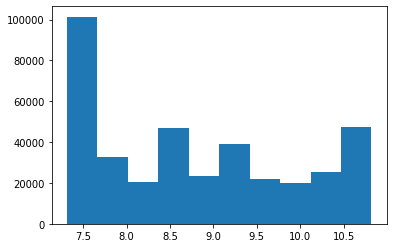

In [34]:
plt.hist(starts_2['goal'])

In [35]:
from scipy.stats import jarque_bera
from scipy.stats import normaltest

pd.options.display.float_format = '{:.5f}'.format

ozellikler = ["goal", "pledged", "usd pledged","usd_pledged_real","usd_goal_real"]
dagilim_testleri = pd.DataFrame(columns=['ozellik', 'jarque_bera_stats', 'jarque_bera_p_value', 
                                         'normal_stats', 'normal_p_value'])

for ozellik in ozellikler:
    jb_stats = jarque_bera(starts_2[ozellik])
    norm_stats = normaltest(starts_2[ozellik])
    dagilim_testleri = dagilim_testleri.append({"ozellik": ozellik,
                                                "jarque_bera_stats" : jb_stats[0] ,
                                                "jarque_bera_p_value" : jb_stats[1] ,
                                                "normal_stats": norm_stats[0] , 
                                                "normal_p_value" : norm_stats[1]
                                               }, ignore_index=True)
dagilim_testleri

,ozellik,jarque_bera_stats,jarque_bera_p_value,normal_stats,normal_p_value
0,goal,27164.98046,0.00000,241288.55998,0.00000
1,pledged,20771.79666,0.00000,44804.48053,0.00000
2,usd pledged,21919.76947,0.00000,95660.29753,0.00000
3,usd_pledged_real,21490.19489,0.00000,46191.14992,0.00000
4,usd_goal_real,47867.78765,0.00000,16698.75154,0.00000


In [36]:
# görüldüğü gibi değişkenlerimiz normal dağılımlı değil çünkü p degeri 0 çıkmış halen aykırı değer var mı bakalım ?

In [37]:
log_esik_degerleri_starts_2 = pd.DataFrame()
degiskenler = ['goal', 'pledged',"usd pledged","usd_pledged_real","usd_goal_real"]
for j in degiskenler:
    for esik_degeri in np.arange(1,5,1):
        q75_log, q25_log = np.percentile(np.log(starts[j]), [75 ,25])
        caa_log = q75_log - q25_log
        q75, q25 = np.percentile(starts[j], [75 ,25])
        caa= q75 - q25
        min_deger_log = q25_log - (caa_log*esik_degeri) 
        maks_deger_log = q75_log + (caa_log*esik_degeri)
        min_deger= q25 - (caa*esik_degeri) #log dönüşümü olmadan
        maks_deger = q75 + (caa*esik_degeri) #log dönüşümü olmadan
        aykiri_deger_sayisi_log = len((np.where((starts_2[j] > maks_deger_log)| 
                                               (starts_2[j] < min_deger_log))[0]))
        log_esik_degerleri_starts_2 = log_esik_degerleri_starts_2.append({'esik_degeri': esik_degeri,
                                                            'aykiri_deger_sayisi_log': aykiri_deger_sayisi_log 
                                                            }, ignore_index=True)
    print("-"*10,"",j,"-"*10)
    display(log_esik_degerleri_starts_2)
    log_esik_degerleri_starts_2 = pd.DataFrame()

----------  goal ----------


,aykiri_deger_sayisi_log,esik_degeri
0,0.00000,1.00000
1,0.00000,2.00000
2,0.00000,3.00000
3,0.00000,4.00000


----------  pledged ----------


,aykiri_deger_sayisi_log,esik_degeri
0,724.00000,1.00000
1,0.00000,2.00000
2,0.00000,3.00000
3,0.00000,4.00000


----------  usd pledged ----------


,aykiri_deger_sayisi_log,esik_degeri
0,426.00000,1.00000
1,0.00000,2.00000
2,0.00000,3.00000
3,0.00000,4.00000


----------  usd_pledged_real ----------


,aykiri_deger_sayisi_log,esik_degeri
0,663.00000,1.00000
1,0.00000,2.00000
2,0.00000,3.00000
3,0.00000,4.00000


----------  usd_goal_real ----------


,aykiri_deger_sayisi_log,esik_degeri
0,23703.00000,1.00000
1,3842.00000,2.00000
2,724.00000,3.00000
3,47.00000,4.00000


In [38]:
# görüldüğü gibi goal değişkenini hem log hemde winsorize ederken bütün aykırı değerlerini oradan kaldırmışız. 

In [176]:
starts_2.to_csv('Winsorize_log_starts',encoding='utf-8')

### Özet ; Aykırı değerlerden kurtulmak adına değikenlerimizin log ifadelerinin aldık ve goal değikeni bizim hedef değişkenlerimizden biri oldugu için; log ifadesi alınmış goal değişkeninde bulunan aykırı değerlerden kurtulmak için winsorize ettik fakat mantıklı bir yaklaşım olmadı değişkenimizi normal dağılımdan uzaklaştırdı ve veri gerçekçiliğini kaybetti dolayısıyla bu yakalaşım yanlış sonuçlandı. Şimdi bütün değişkenlerimizi normalize edip aykırı değerlerden kurtulmaya çalışacağız. 

In [39]:
starts.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.00000,2015-08-11 12:12:28,0.00000,failed,0,GB,0.00000,0.00000,1533.95000
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.00000,2017-09-02 04:43:57,2421.00000,failed,15,US,100.00000,2421.00000,30000.00000
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.00000,2013-01-12 00:20:50,220.00000,failed,3,US,220.00000,220.00000,45000.00000
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.00000,2012-03-17 03:24:11,1.00000,failed,1,US,1.00000,1.00000,5000.00000
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.00000,2015-07-04 08:35:03,1283.00000,canceled,14,US,1283.00000,1283.00000,19500.00000


In [40]:
starts.isnull().sum()*100/starts.shape[0]

ID                 0.00000
name               0.00000
category           0.00000
main_category      0.00000
currency           0.00000
deadline           0.00000
goal               0.00000
launched           0.00000
pledged            0.00000
state              0.00000
backers            0.00000
country            0.00000
usd pledged        0.00000
usd_pledged_real   0.00000
usd_goal_real      0.00000
dtype: float64

In [41]:
from sklearn.preprocessing import normalize

starts["norm_goal"] = normalize(np.array(starts["goal"]).reshape(1,-1)).reshape(-1,1)
starts["norm_pledged"] = normalize(np.array(starts["pledged"]).reshape(1,-1)).reshape(-1,1)
#starts["norm_usd_pledged"] = normalize(np.array(starts["usd pledged"]).reshape(1,-1)).reshape(-1,1)
starts["norm_usd_pledged_real"] = normalize(np.array(starts["usd_pledged_real"]).reshape(1,-1)).reshape(-1,1)
starts["norm_usd_goal_real"] = normalize(np.array(starts["usd_goal_real"]).reshape(1,-1)).reshape(-1,1)

normal_ozellikler=["goal","norm_goal","pledged","norm_pledged",
                    "usd_pledged_real","norm_usd_pledged_real","usd_goal_real","norm_usd_goal_real"]


print('Minimum Değer\n-----------------',)
print(starts[normal_ozellikler].min())
print('\nMaksimum Değer\n-----------------',)
print(starts[normal_ozellikler].max())

Minimum Değer
-----------------
goal                    0.01000
norm_goal               0.00000
pledged                 0.00000
norm_pledged            0.00000
usd_pledged_real        0.00000
norm_usd_pledged_real   0.00000
usd_goal_real           0.01000
norm_usd_goal_real      0.00000
dtype: float64

Maksimum Değer
-----------------
goal                    100000000.00000
norm_goal                       0.13721
pledged                  20338986.27000
norm_pledged                    0.34385
usd_pledged_real         20338986.27000
norm_usd_pledged_real           0.36153
usd_goal_real           166361390.71000
norm_usd_goal_real              0.23430
dtype: float64


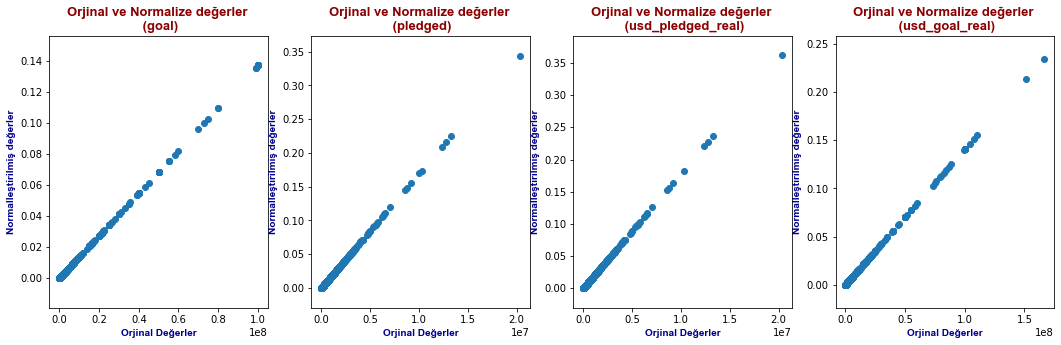

In [42]:
plt.figure(figsize=(18,5))

for i in range(4):
    plt.subplot(1,4,i+1)
    plt.scatter(starts[normal_ozellikler[2*i]], starts[normal_ozellikler[2*i+1]])
    plt.title("Orjinal ve Normalize değerler \n ({})".format(normal_ozellikler[2*i]), fontdict=baslik_font)
    plt.xlabel("Orjinal Değerler", fontdict=eksen_font)
    plt.ylabel("Normalleştirilmiş değerler", fontdict=eksen_font)

plt.show()

In [53]:
# göründüğü gibi ayıkırı değerlerimizin sayısı birkaç adete indi. Şimdi burada winsorize kullanabiliriz. 

(array([227628.,  60789.,  28956.,  14420.,   6676.,  10698.,   3723.,
          2226.,   3590.,  19955.]),
 array([1.37206195e-11, 1.23485699e-05, 2.46971261e-05, 3.70456823e-05,
        4.93942385e-05, 6.17427947e-05, 7.40913510e-05, 8.64399072e-05,
        9.87884634e-05, 1.11137020e-04, 1.23485576e-04]),
 <a list of 10 Patch objects>)

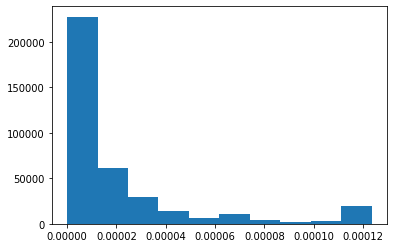

In [43]:
plt.hist(winsorize(starts['norm_goal'], (0,.05)))

(array([3.78507e+05, 4.40000e+01, 3.20000e+01, 1.40000e+01, 1.60000e+01,
        5.00000e+00, 1.00000e+00, 4.00000e+00, 0.00000e+00, 3.80000e+01]),
 array([1.37206195e-11, 1.37206195e-02, 2.74412391e-02, 4.11618586e-02,
        5.48824781e-02, 6.86030977e-02, 8.23237172e-02, 9.60443367e-02,
        1.09764956e-01, 1.23485576e-01, 1.37206195e-01]),
 <a list of 10 Patch objects>)

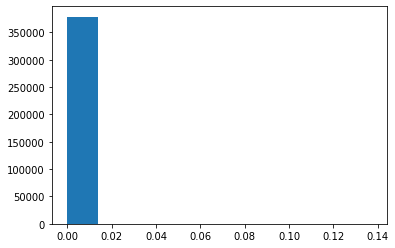

In [44]:
plt.hist(starts['norm_goal'])

### Evet, görüldüğü gibi normalleşme işleminden sonra hedef deişkenimiz normal dağılımından çok uzaklaştı. Bu veri üzerinden çalışmaktan ziyade log ifadesi alınmış ve hedef değişkeni winsorize edilmiş olan veri seti ile çalışacağız. Bu veri seti bize kolaylık sağşayacaktır.

In [45]:
starts_2.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,7.31322,2015-08-11 12:12:28,0.00000,failed,0,GB,0.00000,0.00000,7.33560
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,10.30895,2017-09-02 04:43:57,7.79235,failed,15,US,4.61512,7.79235,10.30895
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,10.71442,2013-01-12 00:20:50,5.39816,failed,3,US,5.39816,5.39816,10.71442
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,8.51719,2012-03-17 03:24:11,0.69315,failed,1,US,0.69315,0.69315,8.51719
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,9.87817,2015-07-04 08:35:03,7.15774,canceled,14,US,7.15774,7.15774,9.87817


(array([101365.,  32872.,  20284.,  46906.,  23529.,  38889.,  22161.,
         19896.,  25561.,  47198.]),
 array([ 7.31322039,  7.66387618,  8.01453197,  8.36518776,  8.71584355,
         9.06649934,  9.41715513,  9.76781092, 10.1184667 , 10.46912249,
        10.81977828]),
 <a list of 10 Patch objects>)

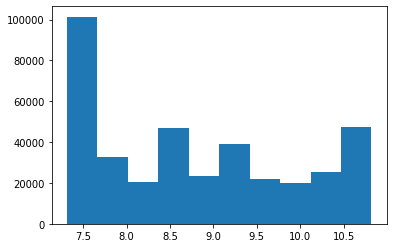

In [46]:
plt.hist(starts_2['goal'])

In [47]:
starts_2['success_pleged_ration']= (starts['pledged']*100)/starts['goal']

In [56]:
starts_2.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,success_pleged_ration
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,7.31322,2015-08-11 12:12:28,0.00000,failed,0,GB,0.00000,0.00000,7.33560,0.00000
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,10.30895,2017-09-02 04:43:57,7.79235,failed,15,US,4.61512,7.79235,10.30895,8.07000
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,10.71442,2013-01-12 00:20:50,5.39816,failed,3,US,5.39816,5.39816,10.71442,0.48889
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,8.51719,2012-03-17 03:24:11,0.69315,failed,1,US,0.69315,0.69315,8.51719,0.02000
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,9.87817,2015-07-04 08:35:03,7.15774,canceled,14,US,7.15774,7.15774,9.87817,6.57949


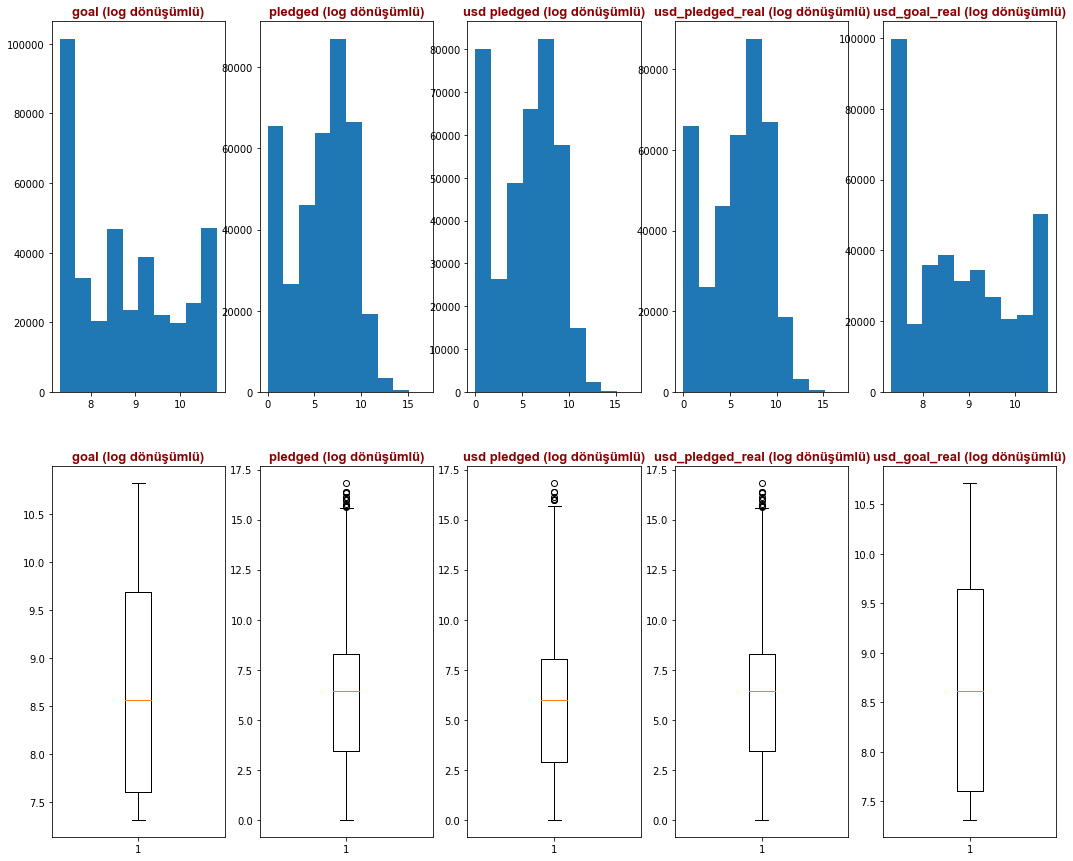

In [55]:
plt.figure(figsize=(18,15))
log_columns=['goal','pledged','usd pledged','usd_pledged_real','usd_goal_real','success_pleged_ration']
    
for i in range(5):
    plt.subplot(2, 5, i+1)
    plt.hist(starts_2[log_columns[i]])
    plt.title(log_columns[i] + ' (log dönüşümlü)', fontdict=baslik_font)
for i in range(5):
    plt.subplot(2, 5, i+6)
    plt.boxplot(starts_2[log_columns[i]])
    plt.title(log_columns[i] + ' (log dönüşümlü)', fontdict=baslik_font)

In [59]:
corr_starts_2=starts_2.corr()
display(corr_starts_2)

,ID,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real,success_pleged_ration
ID,1.00000,-0.00023,-0.00127,0.00065,-0.00570,-0.00142,-0.00062,-0.00084
goal,-0.00023,1.00000,0.13613,0.08855,0.10863,0.12260,0.97763,-0.01197
pledged,-0.00127,0.13613,1.00000,0.18537,0.92398,0.99618,0.13106,0.01363
backers,0.00065,0.08855,0.18537,1.00000,0.17490,0.18614,0.08950,0.01661
usd pledged,-0.00570,0.10863,0.92398,0.17490,1.00000,0.93112,0.12469,0.01200
usd_pledged_real,-0.00142,0.12260,0.99618,0.18614,0.93112,1.00000,0.13210,0.01367
usd_goal_real,-0.00062,0.97763,0.13106,0.08950,0.12469,0.13210,1.00000,-0.01209
success_pleged_ration,-0.00084,-0.01197,0.01363,0.01661,0.01200,0.01367,-0.01209,1.00000


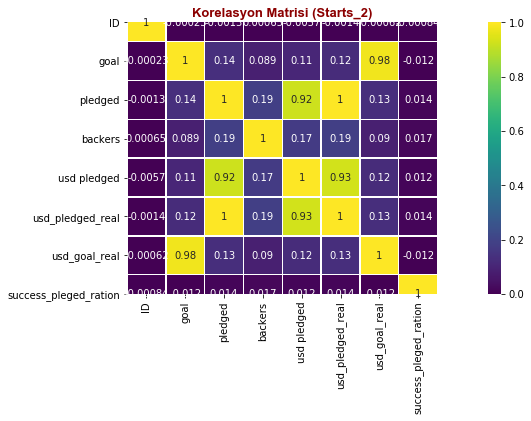

In [61]:
plt.figure(figsize=(18,5))
sns.heatmap(corr_starts_2, square=True, annot=True, linewidths=.5, vmin=0, vmax=1, cmap='viridis')
plt.title("Korelasyon Matrisi (Starts_2)", fontdict=baslik_font)

plt.show()